<a href="https://colab.research.google.com/github/brunoviti/DATAPROJECTS/blob/main/Volleyball_wk1_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Volleyball Dataset

We have been provided a dataset by the Texas Tech University Women's Volleyball team.  The dataset represents an entire season of data collected from the "VERT" device -- which is widely used in the sport of volleyball.  We have "mis-identified" the players names -- to keep it interesting but without including the original players names.

One important caveat of this dataset is that the team used the system for their home practices, scrimmages and games -- but not for their travel games or practices while on the road.  Therefore, we have to be careful not to over- or mis-interpret the "weekly" loads -- as the dataset does not capture every practice and game.  So -- we don't want to try and evaluate this  dataset from a standpoint of whole season workload changes.  Nevertheless, it provides us a great dataset to "jump in" and start looking at some of the measures and metrics that can be used to evaluate team sports!

So, let's get started and load up this dataset!


## Import LIbraries and Dataset

In [76]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime
from IPython.display import display, HTML


# Read in the dataset

df = pd.read_csv("/content/TexasTechVBall.csv")
df.head()

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %
0,8/19/19,PRAC,8/19/19,Erika,S,1595,2750,2.9,9.6,15.6,...,116,8,0,17.7,14.0,62,22.5,0,0,0
1,8-19-19#2,PRAC,8/19/19,Erika,S,1020,2750,1.9,8.4,14.6,...,62,2,1,21.7,13.4,60,22.5,0,0,0
2,8/19/19,PRAC,8/19/19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,194,126,8,22.2,18.8,75,25.0,3,2,5
3,8-19-19#2,PRAC,8/19/19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,53,41,2,20.4,17.9,72,25.0,4,0,4
4,8/19/19,PRAC,8/19/19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,121,113,91,28.9,26.5,88,30.0,7,2,9


## Data Overview

In [77]:
# we'll make a copy of the dataframe before we get started changing it

df_vb=df

Let's take a look at how the VERT dataset has been characterized regarding data type

In [78]:
df_vb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EVENT NAME          548 non-null    object 
 1   EVENT TYPE          548 non-null    object 
 2   DATE                548 non-null    object 
 3   PLAYER NAME         548 non-null    object 
 4   POSITION            548 non-null    object 
 5   ENERGY              548 non-null    int64  
 6   MAX ENERGY          548 non-null    int64  
 7   SETS BY ENERGY      548 non-null    float64
 8   POWER               548 non-null    float64
 9   INTENSITY           548 non-null    float64
 10  STRESS              548 non-null    float64
 11  ACTIVE MINS         547 non-null    float64
 12  JUMPS               548 non-null    int64  
 13  JUMPS 15+           548 non-null    int64  
 14  JUMPS 20+           548 non-null    int64  
 15  HIGHEST JUMP (in)   547 non-null    float64
 16  AVG HI J

In [79]:
# prompt: necesito generar una tabla con muestra de 3 filas

# Display the first 3 rows of the DataFrame
print(df.head(3))


  EVENT NAME EVENT TYPE     DATE PLAYER NAME POSITION  ENERGY  MAX ENERGY  \
0    8/19/19       PRAC  8/19/19       Erika        S    1595        2750   
1  8-19-19#2       PRAC  8/19/19       Erika        S    1020        2750   
2    8/19/19       PRAC  8/19/19    Adelaide       MB    1869        2500   

   SETS BY ENERGY  POWER  INTENSITY  ...  JUMPS  JUMPS 15+  JUMPS 20+  \
0             2.9    9.6       15.6  ...    116          8          0   
1             1.9    8.4       14.6  ...     62          2          1   
2             4.7    9.4       16.8  ...    194        126          8   

   HIGHEST JUMP (in)  AVG HI JUMP (in)  % MAX JUMP  MAX JUMP (in)  \
0               17.7              14.0          62           22.5   
1               21.7              13.4          60           22.5   
2               22.2              18.8          75           25.0   

   HIGH LANDING %  ALERT LANDING %  ELEVATED LANDING %  
0               0                0                   0  
1      

In [80]:
##INICIO REVERSION DE DATOS PARA DESCUBRIR CALCULO DE E°

In [81]:
# prompt: NECESITO SABER CUANTOS VALORES DISTINTOS TIENE  LA COLUMNA  ALERT LANDING %

# Display the number of unique values in the 'ALERT LANDING %' column.
print(df['ALERT LANDING %'].nunique())


16


In [82]:
# prompt: NECESITO MOSTRAR LOS VALORES DISTINTOS DE LA COLUMNA ALERT LANDING %

# Display the unique values in the 'ALERT LANDING %' column.
print(df['ALERT LANDING %'].unique())


[ 0  2  4  1  3  9  5  6 10  8 11 14  7 12 22 15]


In [84]:
# prompt: NECESITO CONVERTIR LOS VALORES DE LA COLUMNA DATE A TIPO DATE , CREAR LA COLUMNA "SEMANA" INICIANDO DESDE 1 Y LUEGO CONTAR LOS VALORES DISTINTOS DE LA COLUMNA ALERT LANDING % POR SEMANA

import pandas as pd
# Convert 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'])

# Create 'SEMANA' column starting from 1
df['SEMANA'] = (df['DATE'].dt.isocalendar().week).astype(int) - 33


# Group by 'SEMANA' and count unique values in 'ALERT LANDING %'
weekly_unique_alerts = df.groupby('SEMANA')['ALERT LANDING %'].nunique()

weekly_unique_alerts


,ALERT LANDING %
SEMANA,
1,10
2,6
3,3
4,5
5,9
6,8
7,8
8,5
9,10


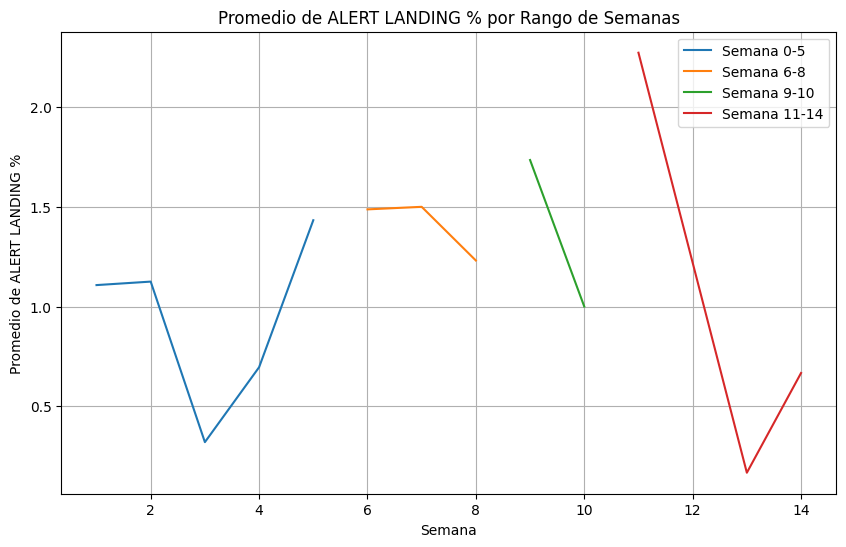

In [85]:
# prompt: NECESITO GRAFICAR LOS VALORES DE alert_landings_percentage POR SEMANA EN 4 RANGOS (SEMANA 0-5,6-8,8-10,10-14

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with 'SEMANA' and 'ALERT LANDING %' columns

# Define the week ranges
week_ranges = [(0, 5), (6, 8), (9, 10), (11, 14)]

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Iterate through the week ranges and plot the data for each range
for start, end in week_ranges:
    # Filter the data for the current week range
    filtered_df = df[(df['SEMANA'] >= start) & (df['SEMANA'] <= end)]

    # Group the filtered data by week and calculate the mean of 'ALERT LANDING %'
    weekly_averages = filtered_df.groupby('SEMANA')['ALERT LANDING %'].mean()

    # Plot the weekly averages
    plt.plot(weekly_averages.index, weekly_averages.values, label=f'Semana {start}-{end}')

# Customize the plot
plt.xlabel('Semana')
plt.ylabel('Promedio de ALERT LANDING %')
plt.title('Promedio de ALERT LANDING % por Rango de Semanas')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


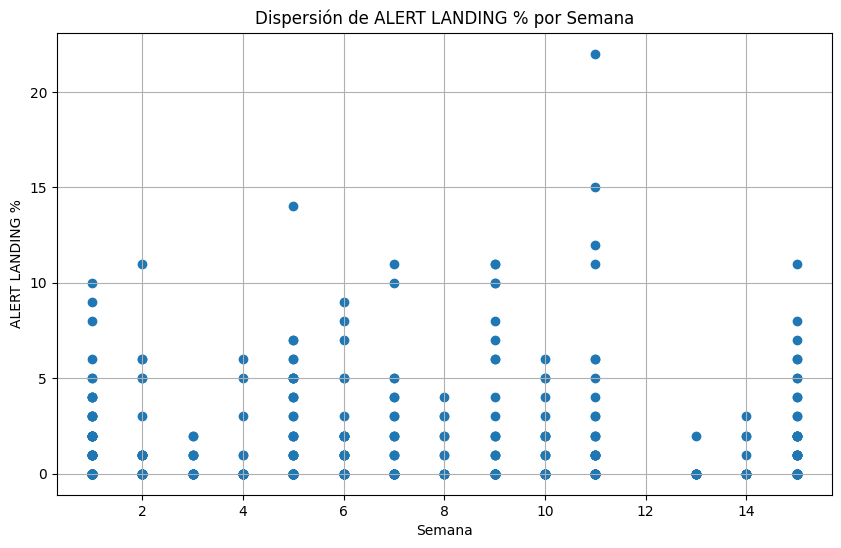

In [86]:
# prompt: NECESITO MOSTRAR UNA DISPERSION DE LOS VALORES DE alert_landings_by_week SEGUN SEMANAS

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with 'SEMANA' and 'ALERT LANDING %' columns

plt.figure(figsize=(10, 6))
plt.scatter(df['SEMANA'], df['ALERT LANDING %'])
plt.xlabel('Semana')
plt.ylabel('ALERT LANDING %')
plt.title('Dispersión de ALERT LANDING % por Semana')
plt.grid(True)
plt.show()


                      ENERGY  MAX ENERGY  SETS BY ENERGY     POWER  INTENSITY  \
ENERGY              1.000000    0.424742        0.697129  0.405756   0.747632   
MAX ENERGY          0.424742    1.000000       -0.275422  0.194242   0.401397   
SETS BY ENERGY      0.697129   -0.275422        1.000000  0.304418   0.461840   
POWER               0.405756    0.194242        0.304418  1.000000   0.541741   
INTENSITY           0.747632    0.401397        0.461840  0.541741   1.000000   
STRESS              0.188208    0.144778        0.150567  0.362981   0.221370   
ACTIVE MINS         0.533134    0.076000        0.497002 -0.061660  -0.021139   
JUMPS               0.683401    0.161730        0.594977  0.321295   0.391908   
JUMPS 15+           0.596532    0.278725        0.457393  0.351385   0.389621   
JUMPS 20+           0.403240    0.157228        0.357922  0.246872   0.281662   
HIGHEST JUMP (in)   0.267655    0.175497        0.215783  0.195186   0.168388   
AVG HI JUMP (in)    0.131193

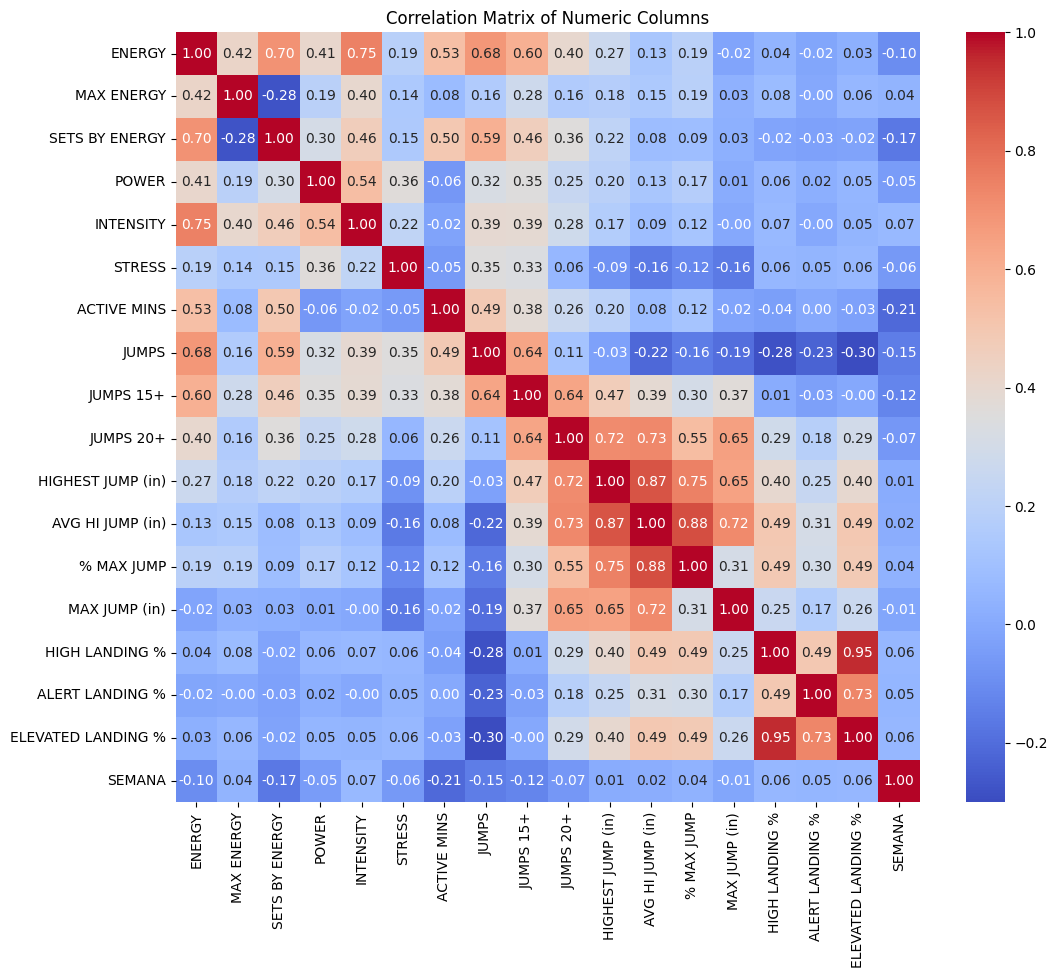


Correlation with 'ALERT LANDING %':
 ALERT LANDING %       1.000000
ELEVATED LANDING %    0.734079
HIGH LANDING %        0.492242
AVG HI JUMP (in)      0.307399
% MAX JUMP            0.296293
HIGHEST JUMP (in)     0.245955
JUMPS 20+             0.183001
MAX JUMP (in)         0.169881
SEMANA                0.052461
STRESS                0.047644
POWER                 0.023496
ACTIVE MINS           0.000167
MAX ENERGY           -0.003186
INTENSITY            -0.004059
ENERGY               -0.015584
SETS BY ENERGY       -0.027958
JUMPS 15+            -0.031617
JUMPS                -0.229604
Name: ALERT LANDING %, dtype: float64


In [91]:
# prompt: NECESITO COMPROBAR UNA CORRELACION ENTRE alert_landings_percentage Y LAS DEMAS COLUMNAS CON VLAORES NUMERICOS

import matplotlib.pyplot as plt
import numpy as np
# Correlation analysis between 'alert_landings_percentage' and other numerical columns

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Specifically for 'ALERT LANDING %'
correlation_with_alert = df[numerical_cols].corr()['ALERT LANDING %'].sort_values(ascending=False)
print("\nCorrelation with 'ALERT LANDING %':")
correlation_with_alert


## Data Preparation

In order to focus down our first look at this dataset, let's limit the number of columns we keep for our initial analysis

In [54]:
# make a list of columns to focus on for the analysis

columns_to_keep = ['EVENT TYPE',
                   'DATE',
                   'PLAYER NAME',
                   'POSITION',
                   'ENERGY',
                   'POWER',
                   'JUMPS 15+',
                   'HIGHEST JUMP (in)',
                   'JUMPS',
                   'WEEK', 'ACTIVE MINS', 'ALERT LANDING %']


df_vb = df_vb.reindex(columns = columns_to_keep)

df_vb.head()

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS,ALERT LANDING %
0,PRAC,2019-08-19,Erika,S,1595,9.6,8,17.7,116,1,102.0,NaN
1,PRAC,2019-08-19,Erika,S,1020,8.4,2,21.7,62,1,70.0,NaN
2,PRAC,2019-08-19,Adelaide,MB,1869,9.4,126,22.2,194,1,111.0,NaN
3,PRAC,2019-08-19,Adelaide,MB,451,8.4,41,20.4,53,1,45.0,NaN
4,PRAC,2019-08-19,Ingrid,OH,2747,10.3,113,28.9,121,1,138.0,NaN


Next we want to begin to break down the season into more typical bins -- such as days of the month or weeks of the season.  


In [8]:
# agregar el numero de la semana del año en la columna WEEK a partir de la fecha explicita en la columna DATE

# Convert 'DATE' column to datetime objects
df_vb['DATE'] = pd.to_datetime(df_vb['DATE'])

# Extract the week number
df_vb['WEEK'] = (df_vb['DATE'].dt.isocalendar().week) -33

df_vb.head()


<ipython-input-8-3e8e20f22177>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vb['DATE'] = pd.to_datetime(df_vb['DATE'])


,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
0,PRAC,2019-08-19,Erika,S,1595,9.6,8,17.7,116,1,102.0
1,PRAC,2019-08-19,Erika,S,1020,8.4,2,21.7,62,1,70.0
2,PRAC,2019-08-19,Adelaide,MB,1869,9.4,126,22.2,194,1,111.0
3,PRAC,2019-08-19,Adelaide,MB,451,8.4,41,20.4,53,1,45.0
4,PRAC,2019-08-19,Ingrid,OH,2747,10.3,113,28.9,121,1,138.0


Note that the "week" column that is being added is determining what week of the year each date in the dataset occurs in.  In order for the first days to be considered "week 1" of the season - we need to subtract the week by the number 33 -- as our first date falls in the 34th week of the calendar year.

We have changed the type for our new variable "week" to an "object" as we do not plan to perform calculations based on the value of week.  This will also allow us to not have calculations performed on this variable.

Note that the original dataset included days where two different training sessions were performed with VERT -- and the "Event Name" in the dateset shows these sessions with the date and the addition of "#2" on the end.  


## Summarizing player data across the season with VERT

We can start by evaluating some summary data according to player position.  In volleyball there are often 4 primary positions: middle blocker (MB), outside hitter (OH), and setter (S) and liberos.  The are expected differences in the duties and attributes of these players and we can perform some simple calculations to evaluate this.  

NOTE: our dataset does not include liberos as they tend to jump less and dive more -- making the VERT device less interesting for them.  (Plus, they don't like to land on their VERT device when diving!)

In [9]:
# Here we can use a simple For/Loop to sum together the total number of jumps for each player across the season

print("Total number of jumps captured using VERT for the season")
for plyr in df_vb['PLAYER NAME'].unique():
    tot_jumps = np.sum(df_vb.where(df_vb['PLAYER NAME']==plyr).dropna()['JUMPS'])
    print(plyr, tot_jumps)

Total number of jumps captured using VERT for the season
Erika 2234.0
Adelaide 5000.0
Ingrid 1922.0
Kimmie 2580.0
Zahra 3738.0
Christine 4274.0
Anja 2812.0
Cassidy 2141.0
Sofia 4695.0
Charlie 4881.0
Amy 5562.0
Kamaria 2812.0
Jasmine 5770.0
Maya 2999.0


That is a lot of jumps!  However, remember that this actually only represents a portion of their actual jumps as it doesn't include any of the teams away games -- or practices that took place while they were traveling.  Later we'll have a dataset that includes all practices and games - but for this team it was a system that they only used at "home".

Now... on to the data we've generated... This is a relatively simple summary and not to hard to digest.  However, it is not very pleasing as it provides only the name and the total number of jumps. It is not sorted in a way that is meaningful to evaluating the season.

Let's use "groupby" to sort this further.  One possibility when looking at a whole season of data is that some players participated in less of the season than others, for example, due to injury.  We can count up how many total events (i.e. practices, games and scrimmages) each player participated in to explore this further.

In [10]:
PG_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION'])[['EVENT TYPE']].count()
print("Total number of practices and games in database according to player name and position")


print(PG_per_player.sort_values(by='EVENT TYPE', ascending = False))

Total number of practices and games in database according to player name and position
                      EVENT TYPE
PLAYER NAME POSITION            
Christine   OH                47
Amy         S                 45
Zahra       OH                45
Kamaria     OH                44
Jasmine     MB                44
Adelaide    MB                41
Sofia       MB                41
Anja        OH                40
Maya        OH                39
Erika       S                 38
Cassidy     OH                34
Kimmie      S                 33
Charlie     S                 30
Ingrid      OH                27


In [11]:
Mins_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during practices and games in database according to player name and position")


print(Mins_per_player.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during practices and games in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH             4619.0
Sofia       MB             4039.0
Kamaria     OH             4013.0
Amy         S              3901.0
Zahra       OH             3841.0
Jasmine     MB             3745.0
Anja        OH             3518.0
Maya        OH             3328.0
Cassidy     OH             3299.0
Adelaide    MB             3266.0
Kimmie      S              3072.0
Charlie     S              2917.0
Erika       S              2848.0
Ingrid      OH             2241.0


This measure is strictly an external measure - as it is just using the acceleration data to produce the "active minutes" variable.  Nevertheless, it does help us gain an appreciation for how much activity each athlete accumulated over the course of the season.

Next, let's take a look at the average numbers of jumps per session according to the player position.

In [12]:
# Calculating the mean number of jumps per collection (practice / game / scrimmage)

jumps_per_position = df_vb.groupby(['POSITION'])[['JUMPS']].mean()

print(jumps_per_position)

               JUMPS
POSITION            
MB        122.738095
OH         75.188406
S         105.938356


Players in the different positions had an average number of jumps between about 75 and 122 -- which doesn't tell us much yet.  However, we expect that setters are not the big "leapers" on the team -- so we can expect that calculating the mean of the higher jumps will show greater separation between the different positions.

In [13]:
# Calculating the mean number of jumps at or greater than 15 inches per collection

jumps15_per_position = df_vb.groupby(['POSITION'])[['JUMPS', 'JUMPS 15+']].mean()
print(jumps15_per_position)

               JUMPS  JUMPS 15+
POSITION                       
MB        122.738095  92.293651
OH         75.188406  62.148551
S         105.938356  24.267123


Now we see a more clear separation according to player position... with the setters having a low number of jumps greater than 15 inches (since most of their jumping is performed at a lower level than the outside hitters and middle blockers).

Let's also look at how many games were recorded with the VERT for each player.

In [14]:
Games_only = df_vb[df_vb['EVENT TYPE'] =="GAME"]

#Games_only.head()

Games_per_player = Games_only.groupby(['PLAYER NAME', 'POSITION']).count()
Games_per_player
Count_of_games_per_player = Games_per_player['JUMPS']
Count_of_games_per_player.sort_values(ascending=False)

,,JUMPS
PLAYER NAME,POSITION,
Amy,S,9
Christine,OH,9
Jasmine,MB,9
Maya,OH,9
Kamaria,OH,9
Anja,OH,8
Zahra,OH,8
Sofia,MB,8
Cassidy,OH,7


It is worth noting that some players had a limited number of games played.  We might want to be careful when performing analyses as these players may have had injury or illness that prevented their full participation in the season.

In [15]:
Practice_only = df_vb[df_vb['EVENT TYPE'] =="PRAC"]
Practice_per_player = Practice_only.groupby(['PLAYER NAME', 'POSITION']).count()
Practice_per_player
Count_of_practice_per_player = Practice_per_player['JUMPS']
Count_of_practice_per_player.sort_values(ascending=False)

,,JUMPS
PLAYER NAME,POSITION,
Christine,OH,37
Zahra,OH,36
Amy,S,35
Adelaide,MB,34
Kamaria,OH,34
Jasmine,MB,34
Sofia,MB,32
Erika,S,31
Anja,OH,31


We see that these same players have a limited number of practices - which suggests that there was something that limited their participation in the season.  

In [16]:
Mins_per_player_Games = Games_only.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during game 'sessions' in database according to player name and position")


print(Mins_per_player_Games.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during game 'sessions' in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH              989.0
Anja        OH              809.0
Jasmine     MB              781.0
Amy         S               772.0
Maya        OH              770.0
Kamaria     OH              746.0
Sofia       MB              714.0
Cassidy     OH              685.0
Zahra       OH              620.0
Charlie     S               492.0
Erika       S               480.0
Kimmie      S               452.0
Adelaide    MB              379.0
Ingrid      OH              181.0


To be fair, this device was not recording only when they were in game play.  It would be recording any time it is on.  Therefore, cheering from the side of the court could also result in some detected activity and contribute to this measure of "active minutes".   

In [17]:
Mins_per_player_Practice = Practice_only.groupby(['PLAYER NAME', 'POSITION'])[['ACTIVE MINS']].sum()
print("Total active minutes during practice in database according to player name and position")


print(Mins_per_player_Practice.sort_values(by='ACTIVE MINS', ascending = False))

Total active minutes during practice in database according to player name and position
                      ACTIVE MINS
PLAYER NAME POSITION             
Christine   OH             3568.0
Sofia       MB             3215.0
Kamaria     OH             3156.0
Zahra       OH             3127.0
Amy         S              3030.0
Jasmine     MB             2872.0
Adelaide    MB             2769.0
Anja        OH             2605.0
Kimmie      S              2518.0
Cassidy     OH             2498.0
Maya        OH             2474.0
Charlie     S              2311.0
Erika       S              2263.0
Ingrid      OH             1968.0


This provides us a look at the total number of jumps performed across the entire season (of collected VERT data).  

In [18]:
PG_per_player = df_vb.groupby(['PLAYER NAME', 'POSITION']).count()
print("Total number of practices and games in database for each player")
PG_per_player

PG_per_player.sort_values(by='EVENT TYPE', ascending = False)['EVENT TYPE']

Total number of practices and games in database for each player


,,EVENT TYPE
PLAYER NAME,POSITION,
Christine,OH,47
Amy,S,45
Zahra,OH,45
Kamaria,OH,44
Jasmine,MB,44
Adelaide,MB,41
Sofia,MB,41
Anja,OH,40
Maya,OH,39


Let's say that we decide we are interested in evaluating the season without a player that was injured.  Let's remove "Ingrid" from this dataset -- since any averages that are computed for the team (and players of her position) will be influenced by her data.  We'll use the "drop" method.

We will set the "player name" column to be the dataframe index and then we will use the drop function to delete any rows of "Ingrid" data.


In [19]:
df_vb2=df_vb.copy()
df_vb2.set_index('PLAYER NAME', inplace=True)
df_vb2.drop(['Ingrid'], axis=0, inplace=True)
PG_per_player2 = df_vb2.groupby(['PLAYER NAME', 'POSITION']).count()
print("Total number of practices and games in database for each player")


PG_per_player2.sort_values(by='EVENT TYPE', ascending = False)['EVENT TYPE']

Total number of practices and games in database for each player


,,EVENT TYPE
PLAYER NAME,POSITION,
Christine,OH,47
Zahra,OH,45
Amy,S,45
Jasmine,MB,44
Kamaria,OH,44
Sofia,MB,41
Adelaide,MB,41
Anja,OH,40
Maya,OH,39


We can see that this dataframe has removed the player named Ingrid -- so we can choose to analyze the season with the entire dataset or with the revised dataset where Ingrid has been removed (e.g. to due to injury).

Now -- let's take a look at the averages for the season with and without Ingrid.  First we will compare the season with the full roster.

In [20]:
for pos, hjump in df_vb.groupby('POSITION'):
    avghj = np.average(hjump['HIGHEST JUMP (in)'].dropna())

    print('Players in position ' + pos + ' have an average highest jump ' + str(round(avghj,1)))
    print('There were ' + str(len(hjump)) + ' records in group ' + str(pos) + ' for processing.')

Players in position MB have an average highest jump 24.6
There were 126 records in group MB for processing.
Players in position OH have an average highest jump 26.1
There were 276 records in group OH for processing.
Players in position S have an average highest jump 19.2
There were 146 records in group S for processing.


Next we will run it with the dataset that doesn't include Ingrid (df_vbp2) -- in order to check our work and see if things make sense.

In [21]:
for pos, hjump in df_vb2.groupby('POSITION'):
    avghj2 = np.average(hjump['HIGHEST JUMP (in)'].dropna())

    print('Players in position ' + pos + ' have an average highest jump ' + str(round(avghj2,1)))
    print('There were ' + str(len(hjump)) + ' records in group ' + str(pos) + ' for processing.')

Players in position MB have an average highest jump 24.6
There were 126 records in group MB for processing.
Players in position OH have an average highest jump 25.9
There were 249 records in group OH for processing.
Players in position S have an average highest jump 19.2
There were 146 records in group S for processing.


We see that there are the expected number of records after removing Ingrid from the new dataset.  We have 276 records from outside hitters in the original dataset - and only 249 records after removing Ingrid. Since we know Ingrid was at 27 practices and games -- all of the calculations add up and make sense.

However, we see that the average highest jump is actually lower after removing Ingrid -- so her highest jumps in her practices and games were higher than the average for her position.  



Finally, let's explore one of the "other" metrics that are provided by "VERT" to understand it better.  Let's start by using the "describe" method to see the range of values across the entire dataset.

In [22]:
# what is "energy"?

df_vb[['ENERGY']].describe()  #description of values for a particular variable

,ENERGY
count,548.000000
mean,1533.454380
std,705.470354
min,220.000000
25%,1036.000000
50%,1471.000000
75%,1962.000000
max,3901.000000


Let's explore this dataset a bit -- by looking at the lowest values across the season and see what they might have in common.  We'll use the "nsmallest" method to look at the 5 lowest values from the sessions collected across the season.

In [23]:
df_vb.nsmallest(5, ['ENERGY'])

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
537,GAME,2019-11-30,Adelaide,MB,220,7.7,11,26.9,11,15,37.0
216,GAME,2019-09-20,Adelaide,MB,239,7.6,10,23.7,11,5,93.0
397,PRAC,2019-10-22,Adelaide,MB,243,9.2,18,25.9,33,10,21.0
286,PRAC,2019-09-26,Jasmine,MB,256,9.1,16,23.8,16,6,21.0
536,GAME,2019-11-30,Erika,S,262,5.7,1,16.0,7,15,78.0


We see the lowest values here are from a mix of games and practice -- and include sessions with a small number of jumps -- though a variable number of active minutes.  Remember that a player on the sidelines of a game can still have "active minutes" and data collected... including the warm-up for the game.  If I had to take a guess -- I would guess that "Adelaide" did not see any (or much) game time in these games that are featured here.  I suspect that the jumps performed here were from the warm-up of the entire team.

Let's take a look at the highest energy values as well -- to see what we can glean from them.

In [24]:
df_vb.nlargest(5, ['ENERGY'])

,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
315,GAME,2019-10-06,Christine,OH,3901,9.2,84,33.4,104,7,131.0
368,GAME,2019-10-16,Charlie,S,3876,10.3,70,21.6,248,9,145.0
267,GAME,2019-09-25,Christine,OH,3829,9.4,96,26.6,126,6,131.0
220,GAME,2019-09-20,Christine,OH,3800,9.6,101,27.4,119,5,113.0
106,PRAC,2019-08-26,Jasmine,MB,3694,12.0,259,25.5,293,2,113.0


Based on this, it appears that Christine has a high "ENERGY" value on a regular basis.  All of these sessions include more than 100 jumps and nearly 100 jumps of more than 15 inches.

Next, let's sort the entire team according to their mean "energy" for each VERT event across the entire season.

In [25]:
PG_Energy = df_vb.groupby(['PLAYER NAME', 'POSITION'])[['ENERGY', 'POWER', 'JUMPS 15+', 'HIGHEST JUMP (in)', 'JUMPS', 'ACTIVE MINS']].sum()
print("Total sum of ENERGY from practices and games for each player")
PG_Energy

PG_Energy.sort_values(by='ENERGY', ascending = False)['ENERGY']

Total sum of ENERGY from practices and games for each player


,,ENERGY
PLAYER NAME,POSITION,
Christine,OH,106427
Jasmine,MB,83894
Amy,S,70206
Kamaria,OH,69482
Sofia,MB,66265
Charlie,S,65800
Maya,OH,63095
Zahra,OH,55645
Anja,OH,52841


Let's look at the average ENERGY value of the players according to the weeks of the season.  We'll generate a basic plot that allows us to visualize changes in the ENERGY score on game days across the season.

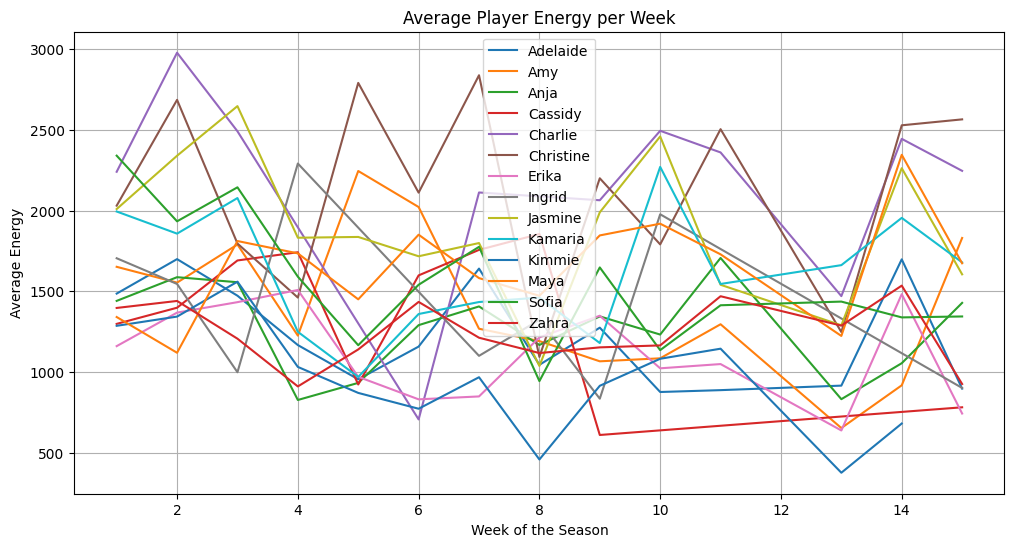

In [26]:
# prompt: CALCULATE average ENERGY value of the players according to the weeks of the season. We'll generate a basic plot that allows us to visualize changes in the ENERGY score on game days across the season.

import matplotlib.pyplot as plt
# Group data by week and player, then calculate the mean energy
weekly_energy = df_vb.groupby(['WEEK', 'PLAYER NAME'])['ENERGY'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for player in weekly_energy['PLAYER NAME'].unique():
    player_data = weekly_energy[weekly_energy['PLAYER NAME'] == player]
    plt.plot(player_data['WEEK'], player_data['ENERGY'], label=player)

plt.xlabel('Week of the Season')
plt.ylabel('Average Energy')
plt.title('Average Player Energy per Week')
plt.legend()
plt.grid(True)
plt.show()


Next, let's produce a matrix to evaluate the correlation between the "energy" metric and the other measures that we have in our current dataset.

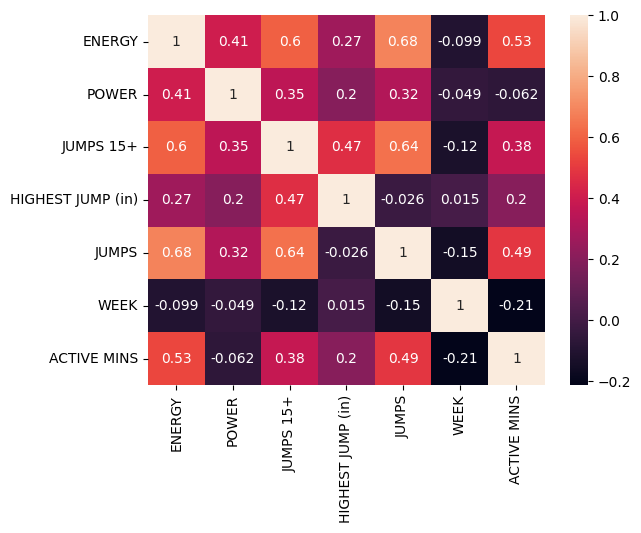

In [27]:
# Select only numeric columns for correlation calculation
numeric_df = df_vb.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numeric DataFrame
corrMatrix = numeric_df.corr()

# Create the heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see from the heatmap that the energy metric is strongly correlated with both "jumps" and "jumps 15+".  Let's plot those directly to see the relationship.

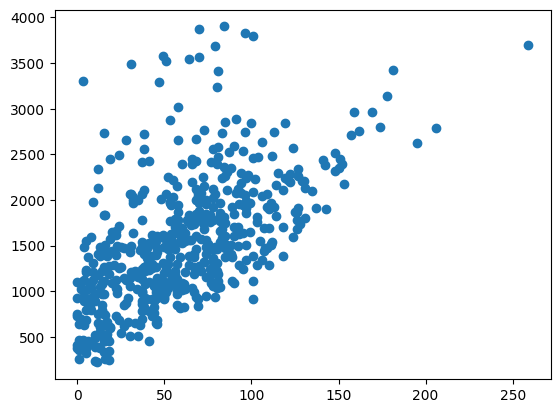

In [28]:
plt.scatter(df_vb['JUMPS 15+'], df_vb['ENERGY'])
plt.show()

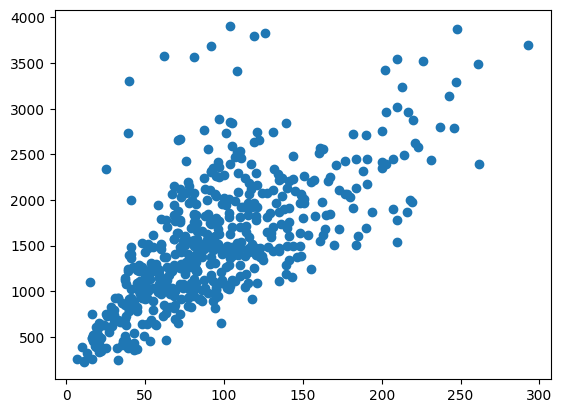

In [29]:
plt.scatter(df_vb['JUMPS'], df_vb['ENERGY'])
plt.show()

So, we see a pretty strong corrleation between the total number of jumps and the "energy" metric provided by VERT.  Keep in mind that this device is an accelerometer... and it is primarily measuring the vertical motion of the athlete.  However, do you think that body weight would be relevant if we were trying to measure the (actual) energy involved in a practice or competition!?  (Definitely!)  However, in many collegiate sports in the United States (including volleyball)-- body weight measures are not measured regularly as body image and disordered eating can be a common problem for high-level athletes.  So, this can be a little tricky.

This is something to keep in mind as we talk more about wearables and all of the different measures and metrics that they provide.  Some wearables will require body weight to be entered for their algorithms -- but certainly not all.  More to come about that in future lessons.

 **TAREA**

In [30]:
# prompt: Calculate the mean value for the total jumps, jumps over 15, jumps over 20 inches, and highest jumps for practice, scrimmage, and game days using the groupby function (grouping by Event Type and Position).

# Group data by 'EVENT TYPE' and 'POSITION', then calculate the mean of specified columns
mean_values = df_vb.groupby(['EVENT TYPE', 'POSITION'])[['JUMPS', 'JUMPS 15+', 'HIGHEST JUMP (in)']].mean()

# Rename columns for clarity
mean_values = mean_values.rename(columns={
    'JUMPS': 'Mean Total Jumps',
    'JUMPS 15+': 'Mean Jumps Over 15',
    'HIGHEST JUMP (in)': 'Mean Highest Jump'
})

mean_values


Mean Total Jumps  Mean Jumps Over 15  Mean Highest Jump
EVENT TYPE POSITION                                                         
GAME       MB               77.652174           64.391304          25.591304
           OH               48.905660           39.981132          26.794340
           S                96.583333           23.458333          19.112500
PRAC       MB              132.010000           97.520000          24.363000
           OH               81.157407           66.995370          25.838605
           S               106.728814           23.991525          19.203390
SCRIMMAGE  MB              159.333333          132.000000          24.600000
           OH               90.000000           80.428571          27.828571
           S               138.750000           37.250000          20.225000

In [31]:
# prompt: Calculate the means of the deceleration landing measures (ie. elevated landing, high landing, and alert landing) for players based on event type and position using the groupby function.

# Calculate the means of deceleration landing measures
deceleration_means = df_vb.groupby(['EVENT TYPE', 'POSITION'])[['JUMPS', 'JUMPS 15+', 'HIGHEST JUMP (in)']].mean()

# Display the result
deceleration_means


JUMPS   JUMPS 15+  HIGHEST JUMP (in)
EVENT TYPE POSITION                                           
GAME       MB         77.652174   64.391304          25.591304
           OH         48.905660   39.981132          26.794340
           S          96.583333   23.458333          19.112500
PRAC       MB        132.010000   97.520000          24.363000
           OH         81.157407   66.995370          25.838605
           S         106.728814   23.991525          19.203390
SCRIMMAGE  MB        159.333333  132.000000          24.600000
           OH         90.000000   80.428571          27.828571
           S         138.750000   37.250000          20.225000

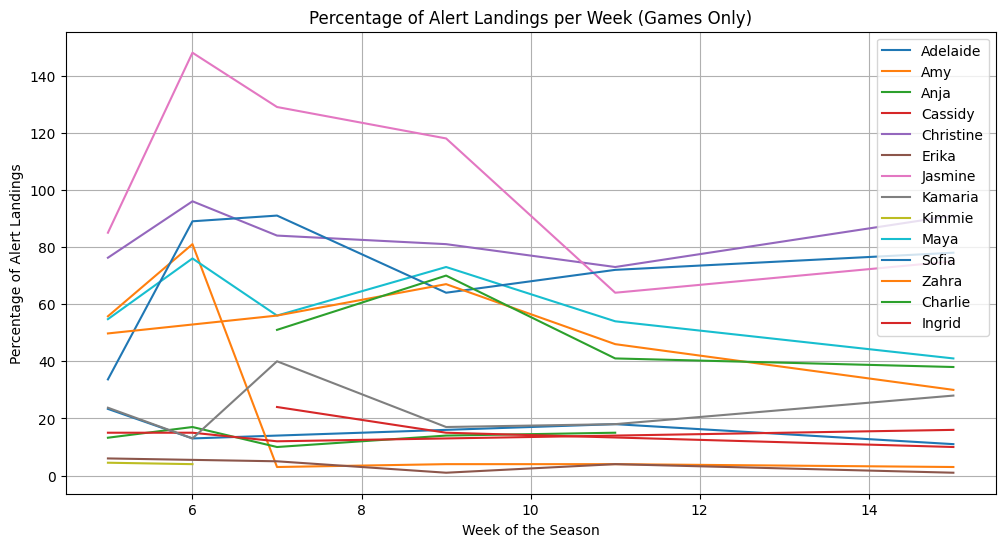

In [32]:
# prompt: Plot each player for their percentage of alert landings during games (only) according to the week of the season.

import matplotlib.pyplot as plt
# Filter for games only
games_df = df_vb[df_vb['EVENT TYPE'] == 'GAME']

# Group data by week, player, and calculate the percentage of alert landings
alert_landings_percentage = games_df.groupby(['WEEK', 'PLAYER NAME'])['JUMPS 15+'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for player in alert_landings_percentage['PLAYER NAME'].unique():
    player_data = alert_landings_percentage[alert_landings_percentage['PLAYER NAME'] == player]
    plt.plot(player_data['WEEK'], player_data['JUMPS 15+'], label=player)

plt.xlabel('Week of the Season')
plt.ylabel('Percentage of Alert Landings')
plt.title('Percentage of Alert Landings per Week (Games Only)')
plt.legend()
plt.grid(True)
plt.show()


Correlation Matrix:


,ENERGY,POWER,JUMPS 15+,HIGHEST JUMP (in),JUMPS,WEEK,ACTIVE MINS
ENERGY,1.000000,0.405756,0.596532,0.267655,0.683401,-0.099377,0.533134
POWER,0.405756,1.000000,0.351385,0.195186,0.321295,-0.049279,-0.061660
JUMPS 15+,0.596532,0.351385,1.000000,0.467907,0.635811,-0.124758,0.378441
HIGHEST JUMP (in),0.267655,0.195186,0.467907,1.000000,-0.025971,0.014647,0.200604
JUMPS,0.683401,0.321295,0.635811,-0.025971,1.000000,-0.151275,0.489707
WEEK,-0.099377,-0.049279,-0.124758,0.014647,-0.151275,1.000000,-0.212699
ACTIVE MINS,0.533134,-0.061660,0.378441,0.200604,0.489707,-0.212699,1.000000



Correlations with 'JUMPS 15+':
ENERGY               0.596532
POWER                0.351385
HIGHEST JUMP (in)    0.467907
JUMPS                0.635811
WEEK                -0.124758
ACTIVE MINS          0.378441
Name: JUMPS 15+, dtype: float64

Highly Correlated Measures (threshold = 0.5):
ENERGY    0.596532
JUMPS     0.635811
Name: JUMPS 15+, dtype: float64


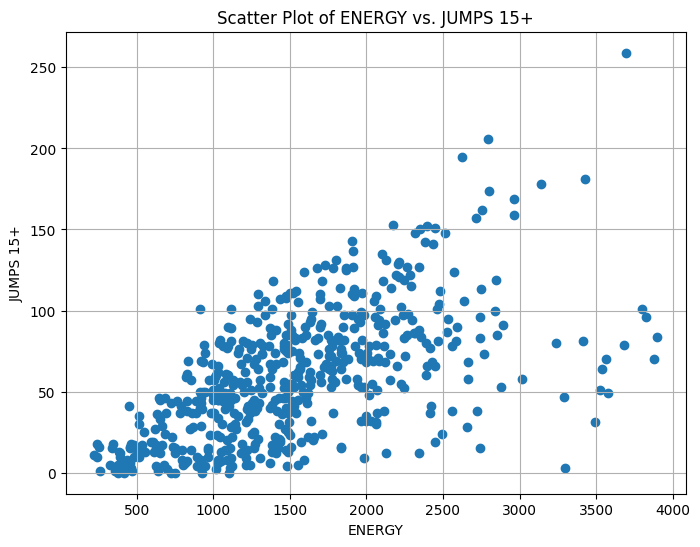

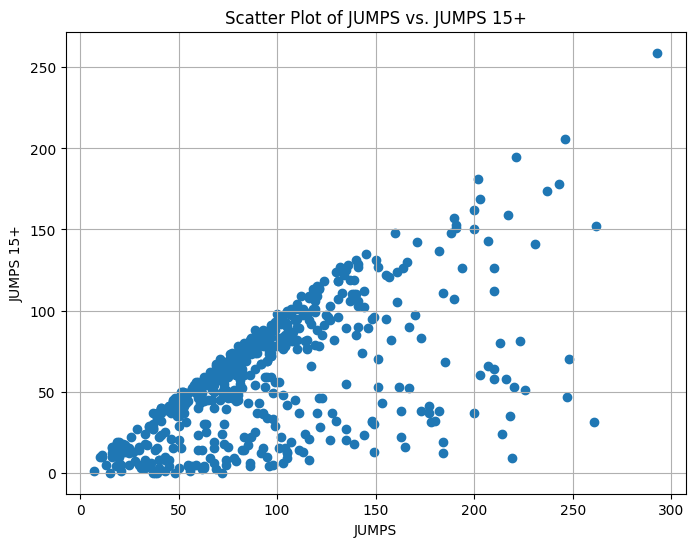

In [33]:
# prompt: Evaluate correlations (e.g. a correlation matrix) of the different vert measures to determine what factor(s) seem most highly correlated with the “elevated landing” measure (which is a combination of the “alert landing” and “high landing” measures).  Determine which other measures (outside of the deceleration measures) are most highly correlated with the “elevated landing” measure.  In addition to the correlation matrix, you could plot the measures that have the highest correlation with “elevated landing %”.  Use all sessions for your analyses (i.e. games, practices, and scrimmages).

import matplotlib.pyplot as plt
# Calculate the correlation matrix
# Select only numeric columns for correlation calculation
numeric_df = df_vb.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Find the correlations with 'JUMPS 15+' (assuming this represents 'elevated landing')
correlations_with_elevated_landing = correlation_matrix['JUMPS 15+'].drop('JUMPS 15+')  # Exclude self-correlation

# Print correlations with elevated landing
print("\nCorrelations with 'JUMPS 15+':")
print(correlations_with_elevated_landing)

# Identify highly correlated measures (e.g., above a certain threshold)
threshold = 0.5  # Example threshold; adjust as needed
highly_correlated_measures = correlations_with_elevated_landing[abs(correlations_with_elevated_landing) > threshold]

print(f"\nHighly Correlated Measures (threshold = {threshold}):")
print(highly_correlated_measures)


# Plot the highly correlated measures against 'JUMPS 15+'
for measure in highly_correlated_measures.index:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_vb[measure], df_vb['JUMPS 15+'])
    plt.xlabel(measure)
    plt.ylabel('JUMPS 15+')
    plt.title(f'Scatter Plot of {measure} vs. JUMPS 15+')
    plt.grid(True)
    plt.show()

In [35]:
# prompt: During games, which player POSITION averages the most Jumps over 15 inches?

# Group data by position and calculate the mean of 'JUMPS 15+'
position_jumps = df_vb.groupby('POSITION')['JUMPS 15+'].mean()

# Find the position with the highest mean 'JUMPS 15+'
max_jumps_position = position_jumps.idxmax()

print(f"The player position with the highest average of jumps over 15 inches is: {max_jumps_position}")


The player position with the highest average of jumps over 15 inches is: MB


In [45]:
# prompt: Which player POSITION might you suspect to be at greatest risk of injury given their mean elevated landing percentages?

# Find the position with the highest mean 'JUMPS 15+'
position_jumps = df_vb.groupby('POSITION')['JUMPS 15+'].mean()
max_jumps_position = position_jumps.idxmax()

print(f"The player position with the highest mean elevated landing percentage is: {max_jumps_position}")


The player position with the highest mean elevated landing percentage is: MB


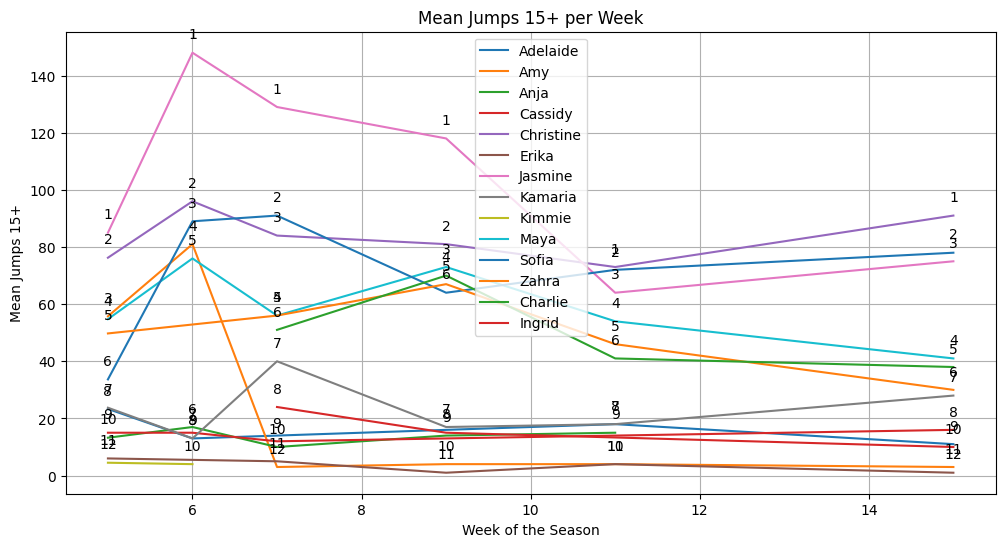

In [48]:
# prompt:  I NEED TO CHANGE THE TYPE OF DATA OF DATE COLUMN TO DATE TYPE AND BEFORE SHOW A RANKING WICH SHOW THE WEEKS AND THEIR ALERT LANDINGS PERCENTAGE

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# ... (Your existing code)

# Convert 'DATE' column to datetime objects
df_vb['DATE'] = pd.to_datetime(df_vb['DATE'])

# Group data by week and player, then calculate the mean of 'JUMPS 15+'
# Rename the column for clarity
alert_landings_percentage = games_df.groupby(['WEEK', 'PLAYER NAME'])['JUMPS 15+'].mean().reset_index().rename(columns={'JUMPS 15+':'Mean Jumps 15+'})


# Create the plot with a ranking
plt.figure(figsize=(12, 6))

for player in alert_landings_percentage['PLAYER NAME'].unique():
    player_data = alert_landings_percentage[alert_landings_percentage['PLAYER NAME'] == player]
    plt.plot(player_data['WEEK'], player_data['Mean Jumps 15+'], label=player)

plt.xlabel('Week of the Season')
plt.ylabel('Mean Jumps 15+')
plt.title('Mean Jumps 15+ per Week')
plt.legend()
plt.grid(True)


# Add ranking to the plot
for week in alert_landings_percentage['WEEK'].unique():
    week_data = alert_landings_percentage[alert_landings_percentage['WEEK'] == week]
    sorted_data = week_data.sort_values(by='Mean Jumps 15+', ascending=False)

    for i, (index, row) in enumerate(sorted_data.iterrows()):
        plt.annotate(str(i+1), (row['WEEK'], row['Mean Jumps 15+']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [56]:
# prompt: During which time frame of the season did the team record the highest Alert Landing percentages?

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_vb is your DataFrame (as defined in your provided code)

# Filter for games only
games_df = df_vb[df_vb['EVENT TYPE'] == 'GAME']

# Group data by week and player, then calculate the mean 'ALERT LANDING %'
alert_landings_by_week = games_df.groupby(['WEEK', 'PLAYER NAME'])['ALERT LANDING %'].mean().reset_index()

# Find the week with the highest average alert landing percentage
max_alert_week = alert_landings_by_week.loc[alert_landings_by_week['ALERT LANDING %'].idxmax()]

print(f"The team recorded the highest average alert landing percentage in week {max_alert_week['WEEK']}.")

# Optional: Visualize alert landing percentages over time
plt.figure(figsize=(10, 6))
for player in alert_landings_by_week['PLAYER NAME'].unique():
  player_data = alert_landings_by_week[alert_landings_by_week['PLAYER NAME'] == player]
  plt.plot(player_data['WEEK'], player_data['ALERT LANDING %'], label=player)
plt.xlabel('Week')
plt.ylabel('Average Alert Landing %')
plt.title('Average Alert Landing Percentage by Week')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-56-5a7adccedcdb>:15: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_alert_week = alert_landings_by_week.loc[alert_landings_by_week['ALERT LANDING %'].idxmax()]


KeyError: nan

In [39]:
# prompt: During what type of session and by which player position was the average highest jump recorded?

# Group data by 'EVENT TYPE' and 'POSITION', then calculate the mean of 'HIGHEST JUMP (in)'
average_highest_jump = df_vb.groupby(['EVENT TYPE', 'POSITION'])['HIGHEST JUMP (in)'].mean()

# Find the maximum average highest jump
max_average_jump = average_highest_jump.max()

# Find the corresponding session type and position
session_position = average_highest_jump[average_highest_jump == max_average_jump].index[0]

print(f"The highest average jump was recorded during {session_position[0]} sessions by players in the {session_position[1]} position.")


The highest average jump was recorded during SCRIMMAGE sessions by players in the OH position.
